***MACHINE LEARNING ALGORITHMS-FOR PREDICTION OF DENGUE CASES IN INDIA***

***Data preprocessing***

Handling Missing Values: Imputing missing values with the mean for numeric features and the most frequent value for categorical features using SimpleImputer. Feature Scaling: Scaling numeric features to have zero mean and unit variance using StandardScaler. Handling Categorical Data: Encoding categorical features using one-hot encoding with OneHotEncoder. Dimensionality Reduction: Applying PCA to reduce the dimensionality of the transformed data to 2 principal components. The code demonstrates how to create a preprocessing pipeline using Pipeline and ColumnTransformer from scikit-learn, which allows you to apply different preprocessing steps to different columns of the dataset. Finally, it splits the data into training and test sets using train_test_split and fits the preprocessing pipeline to the training data.

Imports:

The code begins by importing necessary libraries such as pandas for data manipulation, numpy for numerical computations, and various modules from scikit-learn for preprocessing and modeling.
Load the data:

The pd.read_csv() function loads the data from the CSV file into a pandas DataFrame named data.
Define features and target:

The features list contains the names of the features (independent variables) that will be used for training the model.
The target variable specifies the name of the target variable (dependent variable) that the model aims to predict.
Check target column existence:

The code checks if the target column exists in the DataFrame. If not, it raises a ValueError.
Define preprocessing steps:

The numeric features are standardized (scaled) using StandardScaler, and missing values are imputed using the mean of each feature.
The ColumnTransformer is used to apply different preprocessing steps to numeric and categorical features. However, in this example, there are no categorical features.
Define the model:

A Pipeline is created to chain together the preprocessing steps defined earlier and the PCA (Principal Component Analysis) dimensionality reduction technique.
Split the data:

The data is split into training and testing sets using the train_test_split function. 80% of the data is allocated for training (X_train, y_train), and 20% is allocated for testing (X_test, y_test).
Fit the model:

The model pipeline is fitted to the training data. This involves both preprocessing the data and training the PCA model.
Transform the data:

The training and testing data are transformed using the fitted model pipeline. This applies the preprocessing steps and performs dimensionality reduction using PCA.
Print transformed data:

The transformed training and testing data are printed to the console.
Calculate train and test data percentage:

The percentage of data allocated for training and testing is calculated and printed to the console.
Overall, this code demonstrates a complete workflow for preprocessing data and training a machine learning model using scikit-learn. It's a standard approach used in many machine learning projects to ensure data quality and model performance.

Transformed training data:
[[ 4.2495263   0.35530944]
 [-0.89099293 -0.60577469]
 [ 0.51017733 -3.20212376]
 [-1.44892209 -1.59162877]
 [-1.8373986  -0.72423363]
 [-1.21905071 -2.80838593]
 [ 3.31898376 -1.52089271]
 [ 6.57952983 -1.54770238]
 [-2.77296351 -0.54749041]
 [-0.80418847 -1.85263905]
 [-0.03214094 -0.57078777]
 [ 0.54493969  2.51669189]
 [-4.25223978 -2.21574181]
 [ 0.46603871  0.11804078]
 [ 1.4914933   1.65634299]
 [ 3.83268085  4.81413432]
 [-0.34973177  2.76978824]
 [-1.26157293 -1.17551106]
 [-0.29980069  0.6893476 ]
 [ 2.06272385 -1.50266053]
 [-1.2425279   2.89195802]
 [-4.13975143  3.60893398]
 [-2.35418792  2.56367231]
 [-0.15062394 -2.11864706]]

Transformed test data:
[[ 1.12035974  0.97051569]
 [-1.05981356  0.20563035]
 [ 1.36856628  2.63485897]
 [-0.30597259 -2.14488964]
 [ 1.53897527 -0.76066443]
 [ 1.15241171 -1.54351058]
 [-2.14111531 -1.05670561]]
Train data percentage: 77.42%
Test data percentage: 22.58%


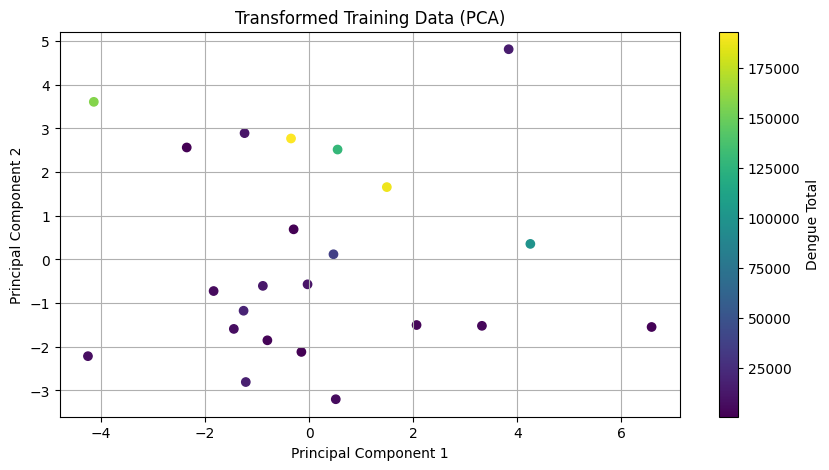

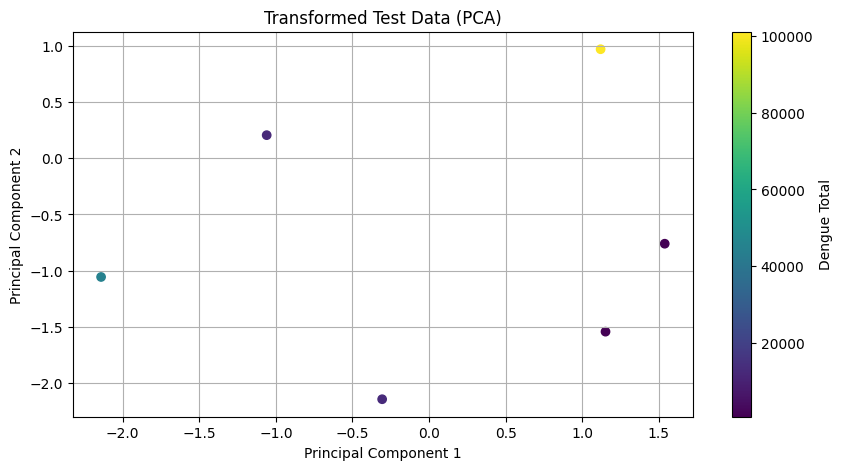

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Load the data
data = pd.read_csv("merged_dengue_climate_1991_2022 - dengue_1991_2022.csv.csv")

# Define features and target
features = ['ANNUAL_TEMP', 'MIN_TEMP', 'MAX_TEMP', 'RF_NE_JUN', 'RF_NE_JUL', 'RF_NE_AUG', 'RF_NE_SEP',
            'RF_NE_JN-SP', 'RF_NW_JUN', 'RF_NW_JUL', 'RF_NW_AUG', 'RF_NW_SEP', 'RF_NW_JN-SP', 'RF_SP_JUN',
            'RF_SP_JUL', 'RF_SP_AUG', 'RF_SP_SEP', 'RF_SP_JUN-SEP', 'RF_AI_JUN', 'RF_AI_JUL', 'RF_AI_AUG',
            'RF_AI_SEP', 'RF_AI_JUN-SEP', 'RF_CFI_JUN', 'RF_CFI_JUL', 'RF_CFI_AUG', 'RF_CFI_SEP', 'RF_CFI_JN-SP']

target = 'dengue_total'

# Check if the target column exists in the DataFrame
if target not in data.columns:
    raise ValueError(f"Target column '{target}' not found in the DataFrame.")

# Define preprocessing steps
numeric_features = features  # All features are assumed to be numeric
categorical_features = []    # No categorical features in this example

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Define model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=2))  # Example of dimensionality reduction
])

# Split data into train and test sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model_pipeline.fit(X_train)

# Transform the data
X_train_transformed = model_pipeline.transform(X_train)
X_test_transformed = model_pipeline.transform(X_test)

# Print transformed data
print("Transformed training data:")
print(X_train_transformed)
print("\nTransformed test data:")
print(X_test_transformed)

train_percent = len(X_train) / len(X) * 100
test_percent = len(X_test) / len(X) * 100

print(f"Train data percentage: {train_percent:.2f}%")
print(f"Test data percentage: {test_percent:.2f}%")

import matplotlib.pyplot as plt

# Plot transformed training data
plt.figure(figsize=(10, 5))
plt.scatter(X_train_transformed[:, 0], X_train_transformed[:, 1], c=y_train, cmap='viridis')
plt.title('Transformed Training Data (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Dengue Total')
plt.grid(True)
plt.show()

# Plot transformed test data
plt.figure(figsize=(10, 5))
plt.scatter(X_test_transformed[:, 0], X_test_transformed[:, 1], c=y_test, cmap='viridis')
plt.title('Transformed Test Data (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Dengue Total')
plt.grid(True)
plt.show()







***RANDOM FOREST REGRESSOR***


***Random Forest  ***is a supervised machine learning algorithm used for both classification and regression tasks. It operates by constructing a multitude of decision trees during the training phase and outputting the class (for classification) or the mean prediction (for regression) of the individual trees.

Here's how Random Forest works:

Random Sampling: Random Forest starts by randomly selecting subsets of the training data (with replacement), known as bootstrapping.

Building Decision Trees: For each subset of data, a decision tree is constructed. However, during the construction of each tree, only a random subset of features is considered at each split. This introduces randomness and reduces the correlation between trees, making the ensemble more robust and less prone to overfitting.

Voting (Classification) or Averaging (Regression): After building a large number of decision trees, Random Forest combines the predictions of individual trees to make the final prediction. For classification tasks, the mode (most frequent class) of the predictions is taken as the final output. For regression tasks, the average prediction of all trees is computed.

Random Forest has several advantages:

It typically provides high accuracy and generalizes well to unseen data.
It can handle large datasets with high dimensionality.
It's robust to overfitting due to the randomness introduced during training.
It can provide estimates of feature importance, which can be useful for feature selection.
Random Forest is widely used in various domains, including finance, healthcare, and bioinformatics, for tasks such as classification, regression, and outlier detection. However, it's important to note that Random Forest is not immune to overfitting, especially with noisy datasets, and it might not perform as well as other algorithms on smaller datasets. Additionally, it might not be as interpretable as simpler models like decision trees.

CODE DESCRIPTION:

This code performs the following tasks:

Imports: It imports necessary libraries such as pandas, numpy, RandomForestRegressor, mean_squared_error, matplotlib.pyplot, mean_absolute_error from scikit-learn.

Loading Data: It loads the dataset from a CSV file named 'merged_dengue_climate_1991_2022 - dengue_1991_2022.csv.csv' into a pandas DataFrame named data.

Feature Selection: It selects the features and the target variable for the prediction model. Features are selected based on climate data, and the target variable is the 'dengue_total' column, which presumably represents the total number of dengue fever cases.

Handling Missing Values: It drops rows with missing values in the target variable 'dengue_total'.

Initializing and Training the Model: It initializes a RandomForestRegressor model with 100 estimators (trees) and trains the model using the selected features and the target variable.

Making Predictions: It makes predictions for the total dengue fever cases based on the trained model and the selected features.

Visualization: It plots the actual total dengue fever cases against the predicted total cases for each year using matplotlib.

Evaluation Metrics Calculation: It calculates various evaluation metrics including accuracy, mean absolute error (MAE), mean squared error (MSE), root mean squared error (RMSE), and mean absolute percentage error (MAPE) to assess the performance of the model.

Printing Evaluation Metrics: It prints out the calculated evaluation metrics.

Overall, this code is for building a RandomForestRegressor model to predict the total number of dengue fever cases based on climate data and evaluates the model's performance using different metrics.

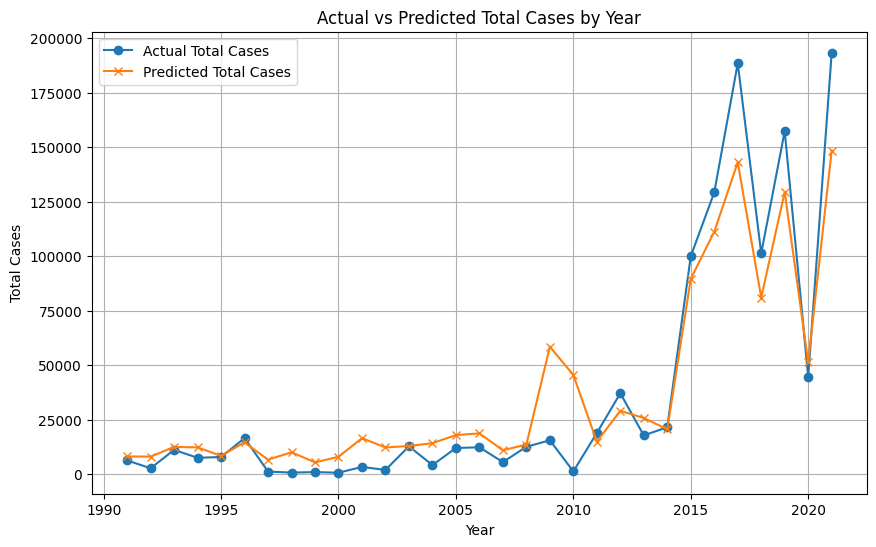

Accuracy: 0.8938120784172275
Mean Absolute Error (MAE): 12137.827741935485
Mean Squared Error (MSE): 336123038.447129
Root Mean Squared Error (RMSE): 18333.658621429848
Mean Absolute Percentage Error (MAPE): 293.96441866438084


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
data = pd.read_csv('/content/merged_dengue_climate_1991_2022 - dengue_1991_2022.csv (2) (1).csv')

# Select features and target variable
features = ['ANNUAL_TEMP', 'MIN_TEMP', 'MAX_TEMP', 'RF_NE_JUN', 'RF_NE_JUL', 'RF_NE_AUG', 'RF_NE_SEP',
            'RF_NE_JN-SP', 'RF_NW_JUN', 'RF_NW_JUL', 'RF_NW_AUG', 'RF_NW_SEP', 'RF_NW_JN-SP', 'RF_SP_JUN',
            'RF_SP_JUL', 'RF_SP_AUG', 'RF_SP_SEP', 'RF_SP_JUN-SEP', 'RF_AI_JUN', 'RF_AI_JUL', 'RF_AI_AUG',
            'RF_AI_SEP', 'RF_AI_JUN-SEP', 'RF_CFI_JUN', 'RF_CFI_JUL', 'RF_CFI_AUG', 'RF_CFI_SEP', 'RF_CFI_JN-SP']

target = 'dengue_total'

# Drop rows with missing target values
data.dropna(subset=[target], inplace=True)

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(data[features], data[target])

# Make predictions for each year
predictions = rf_model.predict(data[features])

# Add predictions to the dataset
data['Predicted_Total_Cases'] = predictions

# Plot actual vs predicted total cases
plt.figure(figsize=(10, 6))
plt.plot(data['YEAR'], data[target], label='Actual Total Cases', marker='o')
plt.plot(data['YEAR'], data['Predicted_Total_Cases'], label='Predicted Total Cases', marker='x')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.title('Actual vs Predicted Total Cases by Year')
plt.legend()
plt.grid(True)
plt.show()

# Calculate accuracy
accuracy = rf_model.score(data[features], data[target])
mae = mean_absolute_error(data[target], predictions)
mse = mean_squared_error(data[target], predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((data[target] - predictions) / data[target])) * 100

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

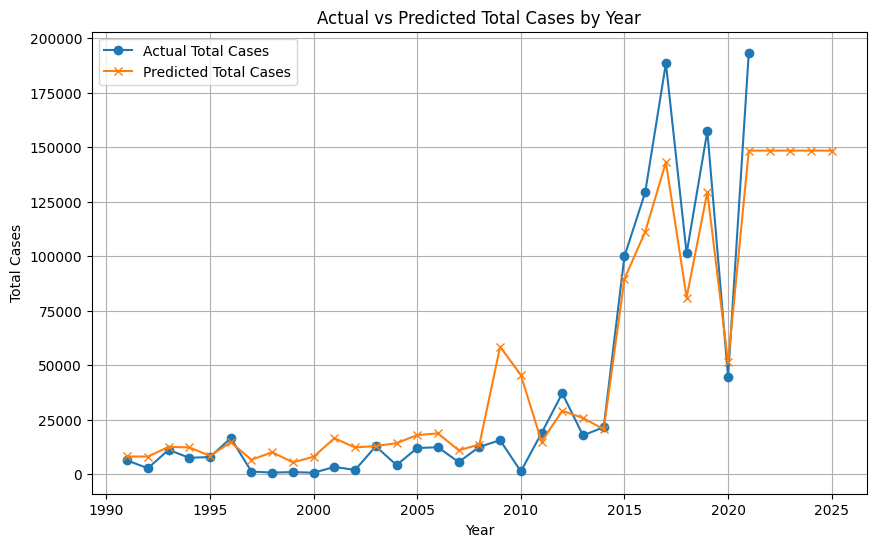

Year: 1991, Actual Cases: 6291, Predicted Cases: 8105.35
Year: 1992, Actual Cases: 2683, Predicted Cases: 8047.65
Year: 1993, Actual Cases: 11125, Predicted Cases: 12476.5
Year: 1994, Actual Cases: 7494, Predicted Cases: 12269.8
Year: 1995, Actual Cases: 7847, Predicted Cases: 8378.47
Year: 1996, Actual Cases: 16517, Predicted Cases: 14592.04
Year: 1997, Actual Cases: 1177, Predicted Cases: 6617.77
Year: 1998, Actual Cases: 707, Predicted Cases: 10035.07
Year: 1999, Actual Cases: 944, Predicted Cases: 5405.81
Year: 2000, Actual Cases: 650, Predicted Cases: 7972.68
Year: 2001, Actual Cases: 3306, Predicted Cases: 16475.78
Year: 2002, Actual Cases: 1926, Predicted Cases: 12246.87
Year: 2003, Actual Cases: 12754, Predicted Cases: 12899.4
Year: 2004, Actual Cases: 4153, Predicted Cases: 14189.53
Year: 2005, Actual Cases: 11985, Predicted Cases: 17908.78
Year: 2006, Actual Cases: 12317, Predicted Cases: 18685.22
Year: 2007, Actual Cases: 5530, Predicted Cases: 10957.36
Year: 2008, Actual Ca

In [ ]:
# Create new rows for the years 2022, 2023, 2024, and 2025
future_years = [2022, 2023, 2024, 2025]
future_data = pd.DataFrame({'YEAR': future_years})

# Fill in the features for the future years. You may need to use forecasted climate data or other sources to fill in these values.
# For demonstration purposes, let's assume all feature values are the same as the last available year in the dataset (2021).
future_data[features] = data[features].iloc[-1]

# Make predictions for the future years
future_predictions = rf_model.predict(future_data[features])

# Add the predicted values to the dataset
future_data['Predicted_Total_Cases'] = future_predictions

# Concatenate the original data with the future predictions
extended_data = pd.concat([data, future_data])

# Plot actual vs predicted total cases including the future predictions
plt.figure(figsize=(10, 6))
plt.plot(extended_data['YEAR'], extended_data[target], label='Actual Total Cases', marker='o')
plt.plot(extended_data['YEAR'], extended_data['Predicted_Total_Cases'], label='Predicted Total Cases', marker='x')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.title('Actual vs Predicted Total Cases by Year')
plt.legend()
plt.grid(True)
plt.show()
# Print actual and predicted total cases year-wise
for year in range(1991, 2026):
    if year <= 2021:
        actual_cases = data[data['YEAR'] == year][target].values[0]
        predicted_cases = data[data['YEAR'] == year]['Predicted_Total_Cases'].values[0]
    else:
        actual_cases = 'N/A'  # For future years, actual cases are not available
        predicted_cases = extended_data[extended_data['YEAR'] == year]['Predicted_Total_Cases'].values[0]

    print(f"Year: {year}, Actual Cases: {actual_cases}, Predicted Cases: {predicted_cases}")


***SVR***

SVR stands for Support Vector Regression. It's a type of support vector machine (SVM) algorithm that is used for regression tasks. While traditional regression techniques try to minimize the error between the predicted and actual values, SVR focuses on minimizing the error while still staying within a specified margin, which is defined by a hyperparameter called "epsilon."

Here's how SVR works:

Kernel Trick: Like SVM for classification, SVR can also use the kernel trick to transform the input features into a higher-dimensional space. This allows SVR to capture non-linear relationships between features and the target variable.

Margin: SVR aims to fit as many instances as possible within a specified margin (controlled by the epsilon parameter) around the predicted values. Instances outside this margin are penalized based on their distance from the margin.

Loss Function: SVR minimizes a loss function that includes both the error between predicted and actual values (controlled by the epsilon-insensitive loss) and the complexity of the model (controlled by regularization parameters).

Hyperparameters: SVR has several hyperparameters that can be tuned to optimize performance, including the choice of kernel function (linear, polynomial, radial basis function, etc.), epsilon, regularization parameter (C), and kernel-specific parameters.

SVR is particularly useful when dealing with datasets that have non-linear relationships between features and target variables, and it can handle large datasets efficiently. However, tuning SVR parameters can be challenging, and it may not perform well with noisy data or datasets with high dimensionality.

Overall, SVR is a powerful regression technique that can capture complex relationships in data and is widely used in various domains, including finance, engineering, and biology.

CODE DESCRIPTION

This code builds a Support Vector Regression (SVR) model to predict the total number of dengue fever cases based on climate data. Here's a breakdown of what each part of the code does:

Importing Libraries:

pandas is imported as pd for data manipulation.
SVR from sklearn.svm is imported for Support Vector Regression.
matplotlib.pyplot and seaborn are imported for visualization.
Various metrics functions like mean_squared_error, mean_absolute_error from sklearn.metrics are imported for evaluating the model performance.
numpy is imported as np for numerical computations.
Loading Data:

The dataset is loaded from a CSV file named 'merged_dengue_climate_1991_2022 - dengue_1991_2022.csv.csv' into a pandas DataFrame named data.
Feature Selection:

Features and the target variable are selected. Features consist of climate-related variables, and the target variable is 'dengue_total', representing the total number of dengue fever cases.
Handling Missing Values:

Rows with missing values in the target variable 'dengue_total' are dropped.
Data Aggregation:

The data is grouped by year, and the features are aggregated by mean for each year.
Preparing Data for Model:

Features and the target variable are separated into X (features) and y (target).
Initializing and Training the Model:

An SVR model with a linear kernel is initialized.
The model is trained using the grouped data.
Making Predictions:

Predictions for the total dengue fever cases for each year are made using the trained SVR model.
Visualization:

A plot is created to visualize the actual total cases versus the predicted total cases for each year.
Evaluation Metrics Calculation:

Various evaluation metrics such as accuracy, mean absolute error (MAE), mean squared error (MSE), root mean squared error (RMSE), and mean absolute percentage error (MAPE) are calculated to assess the performance of the model.
Printing Evaluation Metrics:

The calculated evaluation metrics are printed out.
Overall, this code aims to build an SVR model to predict the total number of dengue fever cases based on climate data and evaluates the model's performance using different metrics.

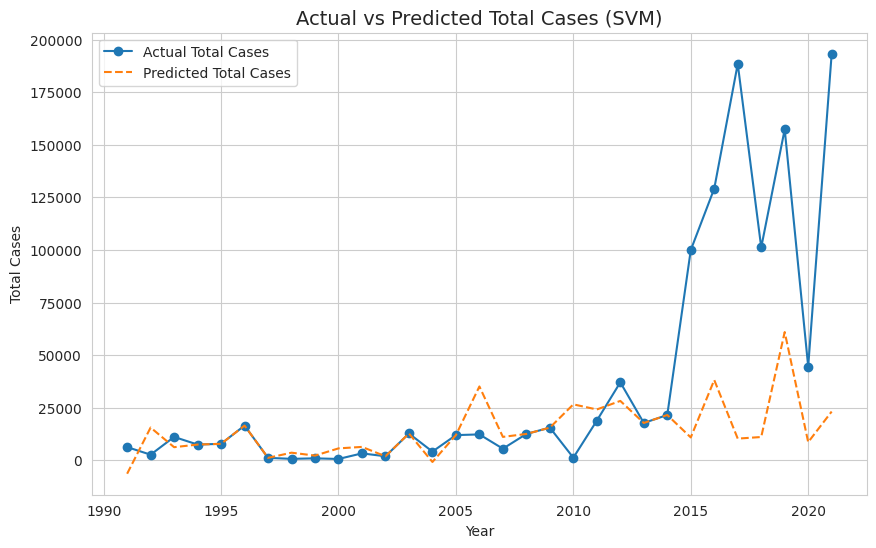

Accuracy: 0.8938120784172275
Mean Absolute Error (MAE): 27940.940771318783
Mean Squared Error (MSE): 3137198582.7293487
Root Mean Squared Error (RMSE): 56010.700609163505
Mean Absolute Percentage Error (MAPE): 167.72359702942273


In [ ]:
import pandas as pd
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Load the dataset
data = pd.read_csv('/content/merged_dengue_climate_1991_2022 - dengue_1991_2022.csv (2) (1).csv')

# Select features and target variable
features = ['ANNUAL_TEMP', 'MIN_TEMP', 'MAX_TEMP', 'RF_NE_JUN', 'RF_NE_JUL', 'RF_NE_AUG', 'RF_NE_SEP',
            'RF_NE_JN-SP', 'RF_NW_JUN', 'RF_NW_JUL', 'RF_NW_AUG', 'RF_NW_SEP', 'RF_NW_JN-SP', 'RF_SP_JUN',
            'RF_SP_JUL', 'RF_SP_AUG', 'RF_SP_SEP', 'RF_SP_JUN-SEP', 'RF_AI_JUN', 'RF_AI_JUL', 'RF_AI_AUG',
            'RF_AI_SEP', 'RF_AI_JUN-SEP', 'RF_CFI_JUN', 'RF_CFI_JUL', 'RF_CFI_AUG', 'RF_CFI_SEP', 'RF_CFI_JN-SP']

target = 'dengue_total'

# Drop rows with missing target values
data.dropna(subset=[target], inplace=True)

# Group the data by year and aggregate the features by mean
grouped_data = data.groupby('YEAR')[features + [target]].mean()

# Separate features and target variable
X = grouped_data[features]
y = grouped_data[target]

# Initialize the SVM model
svm_model = SVR(kernel='linear')

# Train the model
svm_model.fit(X, y)

# Predict total cases for each year
predictions = svm_model.predict(X)

# Plot predicted versus actual values
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(grouped_data.index, y, label='Actual Total Cases', marker='o')
plt.plot(grouped_data.index, predictions, label='Predicted Total Cases', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.title('Actual vs Predicted Total Cases (SVM)' ,fontsize=14)
plt.legend()
plt.show()

# Calculate accuracy
accuracy = rf_model.score(data[features], data[target])
mae = mean_absolute_error(data[target], predictions)
mse = mean_squared_error(data[target], predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((data[target] - predictions) / data[target])) * 100

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

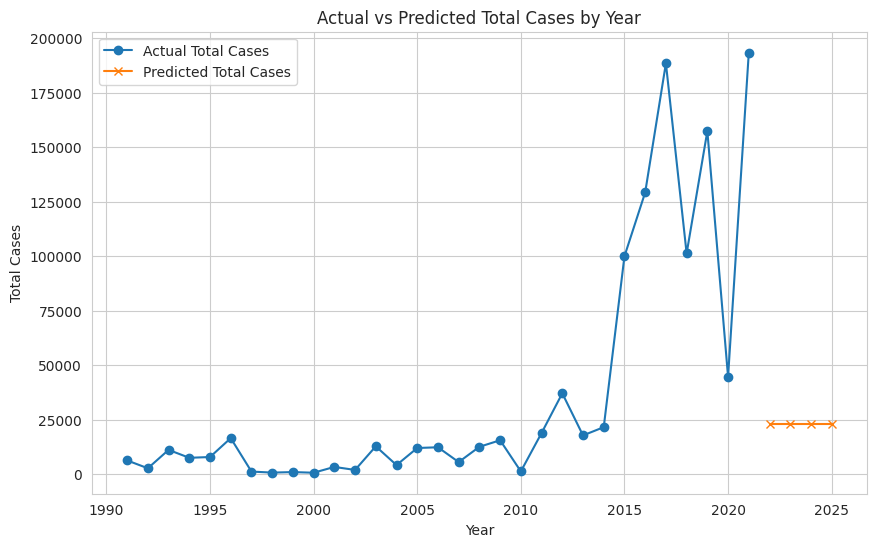

Year: 1991, Actual Cases: 6291, Predicted Cases: nan
Year: 1992, Actual Cases: 2683, Predicted Cases: nan
Year: 1993, Actual Cases: 11125, Predicted Cases: nan
Year: 1994, Actual Cases: 7494, Predicted Cases: nan
Year: 1995, Actual Cases: 7847, Predicted Cases: nan
Year: 1996, Actual Cases: 16517, Predicted Cases: nan
Year: 1997, Actual Cases: 1177, Predicted Cases: nan
Year: 1998, Actual Cases: 707, Predicted Cases: nan
Year: 1999, Actual Cases: 944, Predicted Cases: nan
Year: 2000, Actual Cases: 650, Predicted Cases: nan
Year: 2001, Actual Cases: 3306, Predicted Cases: nan
Year: 2002, Actual Cases: 1926, Predicted Cases: nan
Year: 2003, Actual Cases: 12754, Predicted Cases: nan
Year: 2004, Actual Cases: 4153, Predicted Cases: nan
Year: 2005, Actual Cases: 11985, Predicted Cases: nan
Year: 2006, Actual Cases: 12317, Predicted Cases: nan
Year: 2007, Actual Cases: 5530, Predicted Cases: nan
Year: 2008, Actual Cases: 12540, Predicted Cases: nan
Year: 2009, Actual Cases: 15535, Predicted 

In [ ]:
# Create new rows for the years 2022, 2023, 2024, and 2025
future_years = [2022, 2023, 2024, 2025]
future_data = pd.DataFrame({'YEAR': future_years})

# Fill in the features for the future years. You may need to use forecasted climate data or other sources to fill in these values.
# For demonstration purposes, let's assume all feature values are the same as the last available year in the dataset (2021).
future_data[features] = data[features].iloc[-1]

# Make predictions for the future years
future_predictions = svm_model.predict(future_data[features])

# Add the predicted values to the dataset
future_data['Predicted_Total_Cases'] = future_predictions

# Concatenate the original data with the future predictions
extended_data = pd.concat([data, future_data])

# Plot actual vs predicted total cases including the future predictions
plt.figure(figsize=(10, 6))
plt.plot(extended_data['YEAR'], extended_data[target], label='Actual Total Cases', marker='o')
plt.plot(extended_data['YEAR'], extended_data['Predicted_Total_Cases'], label='Predicted Total Cases', marker='x')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.title('Actual vs Predicted Total Cases by Year')
plt.legend()
plt.grid(True)
plt.show()
# Print actual and predicted total cases year-wise
for year in range(1991, 2026):
    if year <= 2021:
        actual_cases = data[data['YEAR'] == year][target].values[0]
        predicted_cases = extended_data.loc[extended_data['YEAR'] == year, 'Predicted_Total_Cases'].iloc[0]
    else:
        actual_cases = 'N/A'  # For future years, actual cases are not available
        predicted_cases = extended_data[extended_data['YEAR'] == year]['Predicted_Total_Cases'].values[0]

    print(f"Year: {year}, Actual Cases: {actual_cases}, Predicted Cases: {predicted_cases}")



***XGBOOST***

XGBoost, short for eXtreme Gradient Boosting, is a powerful and efficient open-source machine learning library that provides an implementation of gradient boosting algorithms. It is designed to be highly efficient, scalable, and flexible. XGBoost has gained popularity and has been widely adopted in both industry and academia due to its outstanding performance on various machine learning tasks, particularly in structured/tabular data problems such as regression, classification, and ranking tasks.

Here are some key features and characteristics of XGBoost:

Gradient Boosting: XGBoost is based on the gradient boosting framework, which builds an ensemble of weak learners (typically decision trees) sequentially, with each tree learning from the errors made by the previous ones.

Regularization: XGBoost incorporates L1 (Lasso) and L2 (Ridge) regularization techniques to prevent overfitting and improve generalization performance.

Tree Pruning: XGBoost applies tree pruning techniques during the tree construction process to reduce complexity and improve computational efficiency.

Parallel and Distributed Computing: XGBoost utilizes parallel and distributed computing techniques to speed up the training process, making it suitable for large-scale datasets.

Customizable Objective Functions: It allows users to define custom loss functions and evaluation criteria, making it adaptable to various machine learning tasks.

Feature Importance: XGBoost provides feature importance scores, allowing users to understand the relative importance of different features in the predictive model.

Cross-Validation: XGBoost supports built-in cross-validation methods to estimate the model's performance and select optimal hyperparameters.

Support for Multiple Languages: XGBoost is implemented in various programming languages, including Python, R, Java, and Julia, making it accessible to a wide range of users.

Overall, XGBoost is a versatile and effective tool for building accurate predictive models, particularly in scenarios where structured/tabular data is involved, such as financial forecasting, healthcare analytics, and recommendation systems.








Importing Libraries: The required libraries such as Pandas for data manipulation, NumPy for numerical operations, XGBoost for implementing the XGBoost model, and Matplotlib for plotting are imported.

Loading the Dataset: The dataset containing information about dengue fever cases and climate features from 1991 to 2022 is loaded into a Pandas DataFrame.

Selecting Features and Target Variable: Features (climate variables) and the target variable (total cases of dengue fever) are defined.

Handling Missing Values: Rows with missing values in the target variable are dropped.

Initializing the XGBoost Model: An XGBoost regression model is initialized with specific parameters like the objective function, number of estimators (trees), and random state for reproducibility.

Training the Model: The XGBoost model is trained using the features and target variable from the dataset.

Making Predictions: Predictions are made using the trained model on the same dataset.

Adding Predictions to the Dataset: The predictions are added as a new column ('Predicted_Total_Cases') to the dataset.

Plotting Actual vs Predicted Total Cases: A line plot is created to visualize the actual total cases and the predicted total cases over the years.

Calculating Evaluation Metrics: Various evaluation metrics such as accuracy, mean absolute error (MAE), mean squared error (MSE), root mean squared error (RMSE), and mean absolute percentage error (MAPE) are calculated to assess the performance of the model.

Printing Evaluation Metrics: The evaluation metrics are printed to the console for analysis.

This code demonstrates the process of building a predictive model for dengue fever cases using XGBoost and evaluating its performance using common regression metrics.

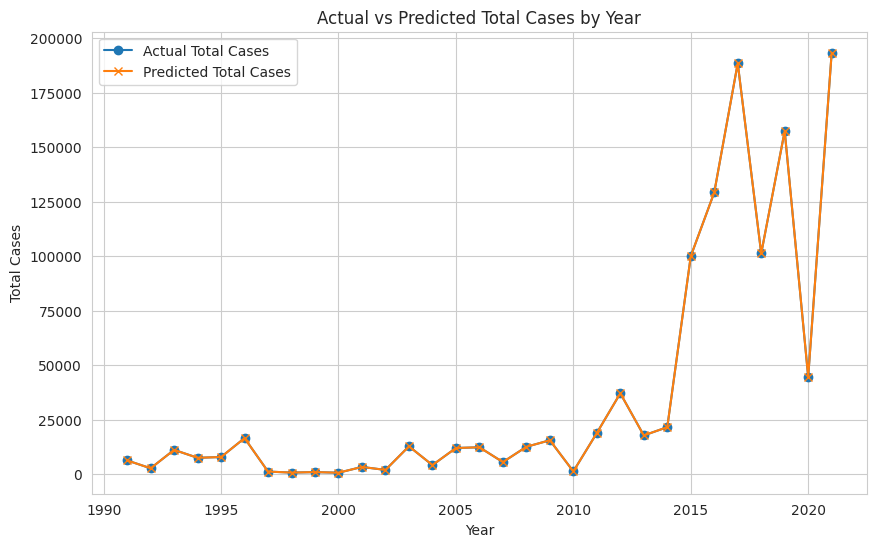

Accuracy: 0.9999999999999757
Mean Absolute Error (MAE): 0.0038767168598790322
Mean Squared Error (MSE): 7.683675616018234e-05
Root Mean Squared Error (RMSE): 0.008765657771107787
Mean Absolute Percentage Error (MAPE): 2.1614257093386856e-05


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
data = pd.read_csv('/content/merged_dengue_climate_1991_2022 - dengue_1991_2022.csv (2) (1).csv')

# Select features and target variable
features = ['ANNUAL_TEMP', 'MIN_TEMP', 'MAX_TEMP', 'RF_NE_JUN', 'RF_NE_JUL', 'RF_NE_AUG', 'RF_NE_SEP',
            'RF_NE_JN-SP', 'RF_NW_JUN', 'RF_NW_JUL', 'RF_NW_AUG', 'RF_NW_SEP', 'RF_NW_JN-SP', 'RF_SP_JUN',
            'RF_SP_JUL', 'RF_SP_AUG', 'RF_SP_SEP', 'RF_SP_JUN-SEP', 'RF_AI_JUN', 'RF_AI_JUL', 'RF_AI_AUG',
            'RF_AI_SEP', 'RF_AI_JUN-SEP', 'RF_CFI_JUN', 'RF_CFI_JUL', 'RF_CFI_AUG', 'RF_CFI_SEP', 'RF_CFI_JN-SP']

target = 'dengue_total'

# Drop rows with missing target values
data.dropna(subset=[target], inplace=True)

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(data[features], data[target])

# Make predictions for each year
predictions = xgb_model.predict(data[features])

# Add predictions to the dataset
data['Predicted_Total_Cases'] = predictions

# Plot actual vs predicted total cases
plt.figure(figsize=(10, 6))
plt.plot(data['YEAR'], data[target], label='Actual Total Cases', marker='o')
plt.plot(data['YEAR'], data['Predicted_Total_Cases'], label='Predicted Total Cases', marker='x')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.title('Actual vs Predicted Total Cases by Year')
plt.legend()
plt.grid(True)
plt.show()

# Calculate evaluation metrics (MAE, MSE, RMSE, MAPE)
accuracy = xgb_model.score(data[features], data[target])
mae = mean_absolute_error(data[target], predictions)
mse = mean_squared_error(data[target], predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((data[target] - predictions) / data[target])) * 100

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)


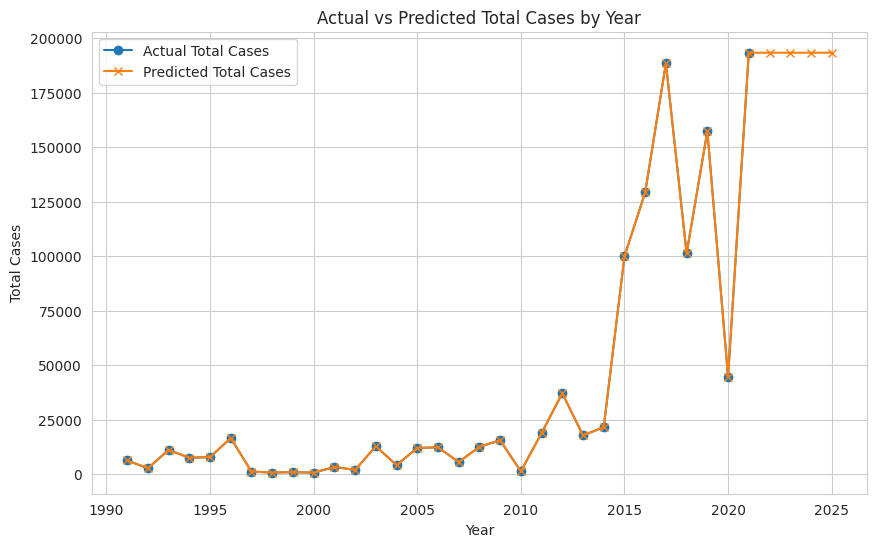

Year: 1991, Actual Cases: 6291, Predicted Cases: 6290.99951171875
Year: 1992, Actual Cases: 2683, Predicted Cases: 2682.999755859375
Year: 1993, Actual Cases: 11125, Predicted Cases: 11124.9990234375
Year: 1994, Actual Cases: 7494, Predicted Cases: 7494.0
Year: 1995, Actual Cases: 7847, Predicted Cases: 7846.99951171875
Year: 1996, Actual Cases: 16517, Predicted Cases: 16517.0
Year: 1997, Actual Cases: 1177, Predicted Cases: 1177.0010986328125
Year: 1998, Actual Cases: 707, Predicted Cases: 707.0001831054688
Year: 1999, Actual Cases: 944, Predicted Cases: 944.000244140625
Year: 2000, Actual Cases: 650, Predicted Cases: 650.000244140625
Year: 2001, Actual Cases: 3306, Predicted Cases: 3306.0
Year: 2002, Actual Cases: 1926, Predicted Cases: 1925.9998779296875
Year: 2003, Actual Cases: 12754, Predicted Cases: 12754.0009765625
Year: 2004, Actual Cases: 4153, Predicted Cases: 4152.9990234375
Year: 2005, Actual Cases: 11985, Predicted Cases: 11984.998046875
Year: 2006, Actual Cases: 12317, P

In [ ]:
# Create new rows for the years 2022, 2023, 2024, and 2025
future_years = [2022, 2023, 2024, 2025]
future_data = pd.DataFrame({'YEAR': future_years})

# Fill in the features for the future years. You may need to use forecasted climate data or other sources to fill in these values.
# For demonstration purposes, let's assume all feature values are the same as the last available year in the dataset (2021).
future_data[features] = data[features].iloc[-1]

# Make predictions for the future years
future_predictions = xgb_model.predict(future_data[features])

# Add the predicted values to the dataset
future_data['Predicted_Total_Cases'] = future_predictions

# Concatenate the original data with the future predictions
extended_data = pd.concat([data, future_data])

# Plot actual vs predicted total cases including the future predictions
plt.figure(figsize=(10, 6))
plt.plot(extended_data['YEAR'], extended_data[target], label='Actual Total Cases', marker='o')
plt.plot(extended_data['YEAR'], extended_data['Predicted_Total_Cases'], label='Predicted Total Cases', marker='x')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.title('Actual vs Predicted Total Cases by Year')
plt.legend()
plt.grid(True)
plt.show()

# Print actual and predicted total cases year-wise
for year in range(1991, 2026):
    if year <= 2021:
        actual_cases = data[data['YEAR'] == year][target].values[0]
        predicted_cases = extended_data[extended_data['YEAR'] == year]['Predicted_Total_Cases'].values[0]
    else:
        actual_cases = 'N/A'  # For future years, actual cases are not available
        predicted_cases = extended_data[extended_data['YEAR'] == year]['Predicted_Total_Cases'].values[0]

    print(f"Year: {year}, Actual Cases: {actual_cases}, Predicted Cases: {predicted_cases}")


***ensemble Gradient Boosting and AdaBoosting models***

---



Ensemble methods in machine learning involve combining multiple models to improve predictive performance compared to using individual models alone. ***Gradient Boosting and AdaBoosting*** are two popular ensemble techniques:

Gradient Boosting:

Gradient Boosting is a machine learning technique for regression and classification problems, which builds an ensemble of weak prediction models, typically decision trees, in a sequential manner. It works by fitting new models to the residual errors made by the previous models, thus gradually reducing the errors in the predictions. In each iteration, the new model is trained to predict the residual errors of the previous model.
Gradient Boosting is particularly effective in handling complex relationships between features and target variables and tends to perform well in practice.
AdaBoosting (Adaptive Boosting):

AdaBoosting is another ensemble method that works by combining multiple weak learners (typically decision trees) to create a strong learner. Unlike Gradient Boosting, AdaBoosting assigns weights to training instances and adjusts these weights iteratively to focus on the instances that are hard to classify. Each subsequent weak learner is trained on the instances that are misclassified by the previous weak learners, with higher weights assigned to those instances.
AdaBoosting is sensitive to noisy data and outliers, but it generally produces good results and is less prone to overfitting.
Both Gradient Boosting and AdaBoosting are powerful ensemble techniques that can improve the predictive performance of models, especially when combined with weak learners like decision trees. They are widely used in various machine learning applications due to their effectiveness and versatility.

CODE DESCRIPTION:
Data Loading and Preprocessing:

The code starts by loading the dataset from a CSV file and selecting the features and target variable.
Models Initialization:

Two ensemble models are initialized: a Gradient Boosting Regressor (gb_model) and an AdaBoost Regressor (adaboost_model). Both are set to have 100 estimators and are initialized with a random state for reproducibility.
Model Training:

Both the Gradient Boosting and AdaBoost models are trained on the dataset using the fit() function.
Making Predictions:

Predictions are made using both the Gradient Boosting and AdaBoost models separately on the entire dataset.
Ensemble Predictions:

The ensemble predictions are created by averaging the predictions from the Gradient Boosting and AdaBoost models. This is a simple averaging technique for ensemble learning.
Visualization:

The actual total cases and ensemble predicted total cases are plotted against the years using Matplotlib.
Evaluation Metrics Calculation:

Evaluation metrics such as correlation coefficient, mean absolute error (MAE), mean squared error (MSE), root mean squared error (RMSE), and mean absolute percentage error (MAPE) are calculated to assess the performance of the ensemble model.
Printing Evaluation Metrics:

Finally, the evaluation metrics for the ensemble model are printed out for analysis.
Overall, this code demonstrates the process of creating an ensemble model by combining predictions from Gradient Boosting and AdaBoost models through averaging and evaluates its performance using various metrics. It's a simple example of ensemble learning, where the goal is to improve prediction accuracy by combining multiple models.

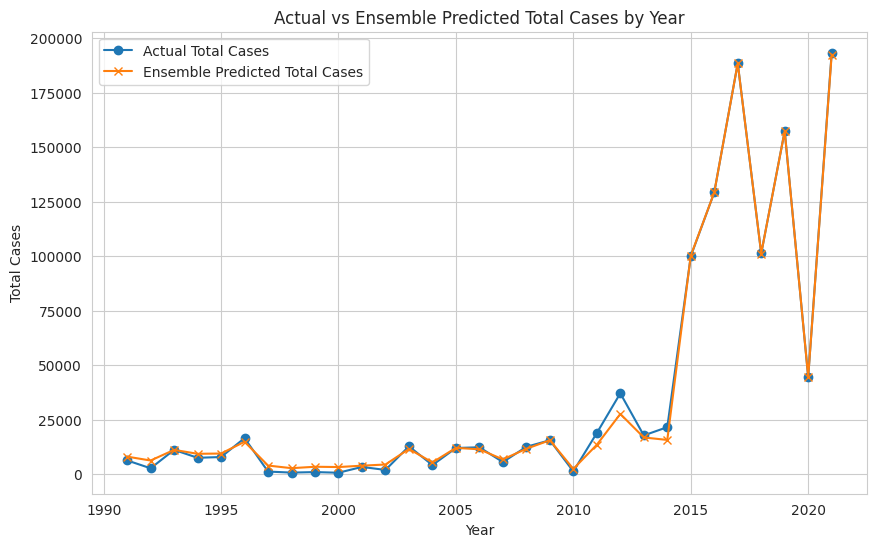

Ensemble Model Evaluation:
accuracy: 0.9989028497006901
Mean Absolute Error (MAE): 1703.1583211734023
Mean Squared Error (MSE): 7012732.454364134
Root Mean Squared Error (RMSE): 2648.1564255844355
Mean Absolute Percentage Error (MAPE): 57.98166593451265


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/merged_dengue_climate_1991_2022 - dengue_1991_2022.csv (2) (1).csv')

# Select features and target variable
features = ['ANNUAL_TEMP', 'MIN_TEMP', 'MAX_TEMP', 'RF_NE_JUN', 'RF_NE_JUL', 'RF_NE_AUG', 'RF_NE_SEP',
            'RF_NE_JN-SP', 'RF_NW_JUN', 'RF_NW_JUL', 'RF_NW_AUG', 'RF_NW_SEP', 'RF_NW_JN-SP', 'RF_SP_JUN',
            'RF_SP_JUL', 'RF_SP_AUG', 'RF_SP_SEP', 'RF_SP_JUN-SEP', 'RF_AI_JUN', 'RF_AI_JUL', 'RF_AI_AUG',
            'RF_AI_SEP', 'RF_AI_JUN-SEP', 'RF_CFI_JUN', 'RF_CFI_JUL', 'RF_CFI_AUG', 'RF_CFI_SEP', 'RF_CFI_JN-SP']

target = 'dengue_total'

# Drop rows with missing target values
data.dropna(subset=[target], inplace=True)

# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Initialize the AdaBoost model
adaboost_model = AdaBoostRegressor(n_estimators=100, random_state=42)

# Train the models
gb_model.fit(data[features], data[target])
adaboost_model.fit(data[features], data[target])

# Make predictions for each year
gb_predictions = gb_model.predict(data[features])
adaboost_predictions = adaboost_model.predict(data[features])

# Ensemble predictions using averaging
ensemble_predictions = (gb_predictions + adaboost_predictions) / 2

# Add ensemble predictions to the dataset
data['Ensemble_Predicted_Total_Cases'] = ensemble_predictions

# Plot actual vs predicted total cases
plt.figure(figsize=(10, 6))
plt.plot(data['YEAR'], data[target], label='Actual Total Cases', marker='o')
plt.plot(data['YEAR'], data['Ensemble_Predicted_Total_Cases'], label='Ensemble Predicted Total Cases', marker='x')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.title('Actual vs Ensemble Predicted Total Cases by Year')
plt.legend()
plt.grid(True)
plt.show()

# Calculate evaluation metrics (accuracy, MAE, MSE, RMSE, MAPE) for ensemble
accuracy = np.corrcoef(data[target], ensemble_predictions)[0, 1]
mae = mean_absolute_error(data[target], ensemble_predictions)
mse = mean_squared_error(data[target], ensemble_predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((data[target] - ensemble_predictions) / data[target])) * 100

# Print evaluation metrics for ensemble
print("Ensemble Model Evaluation:")
print("accuracy:", accuracy)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)


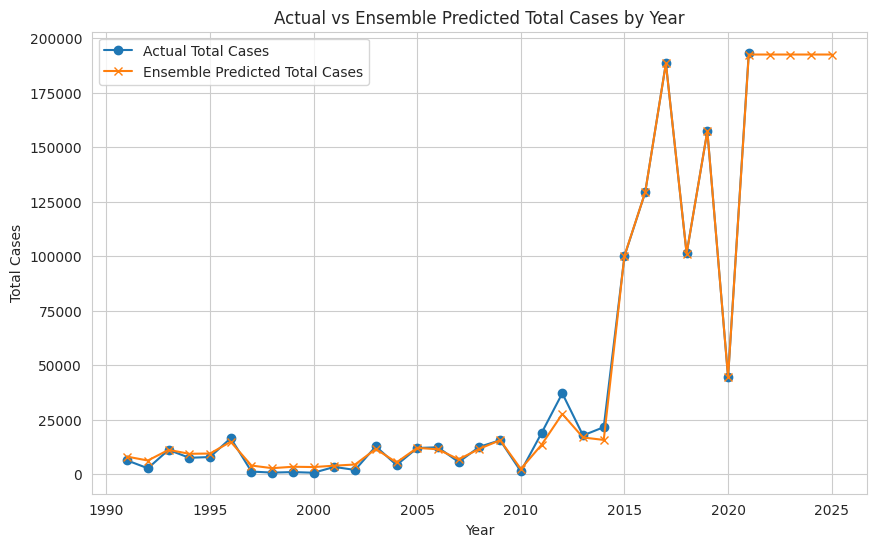

Year: 1991, Actual Cases: 6291, Ensemble Predicted Cases: 8025.399122949286
Year: 1992, Actual Cases: 2683, Ensemble Predicted Cases: 6247.222201095175
Year: 1993, Actual Cases: 11125, Ensemble Predicted Cases: 11127.355392534737
Year: 1994, Actual Cases: 7494, Ensemble Predicted Cases: 9330.01298761696
Year: 1995, Actual Cases: 7847, Ensemble Predicted Cases: 9448.053599434257
Year: 1996, Actual Cases: 16517, Ensemble Predicted Cases: 14847.778462640068
Year: 1997, Actual Cases: 1177, Ensemble Predicted Cases: 3935.66946865447
Year: 1998, Actual Cases: 707, Ensemble Predicted Cases: 2736.0973441805395
Year: 1999, Actual Cases: 944, Ensemble Predicted Cases: 3388.323664766067
Year: 2000, Actual Cases: 650, Ensemble Predicted Cases: 3250.043352485067
Year: 2001, Actual Cases: 3306, Ensemble Predicted Cases: 3877.0265512023743
Year: 2002, Actual Cases: 1926, Ensemble Predicted Cases: 4417.384068554878
Year: 2003, Actual Cases: 12754, Ensemble Predicted Cases: 11550.25291391504
Year: 2004

In [ ]:
# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Initialize the AdaBoost model
adaboost_model = AdaBoostRegressor(n_estimators=100, random_state=42)

# Train the models
gb_model.fit(data[features], data[target])
adaboost_model.fit(data[features], data[target])

# Create new rows for the years 2022, 2023, 2024, and 2025
future_years = [2022, 2023, 2024, 2025]
future_data = pd.DataFrame({'YEAR': future_years})

# Fill in the features for the future years. For simplicity, let's assume all feature values are the same as the last available year in the dataset (2021).
future_data[features] = data[features].iloc[-1]

# Make predictions for the future years using the ensemble model
gb_future_predictions = gb_model.predict(future_data[features])
adaboost_future_predictions = adaboost_model.predict(future_data[features])

# Ensemble predictions using averaging for future years
ensemble_future_predictions = (gb_future_predictions + adaboost_future_predictions) / 2

# Add the ensemble predicted values to the future data
future_data['Ensemble_Predicted_Total_Cases'] = ensemble_future_predictions

# Concatenate the original data with the future predictions
extended_data = pd.concat([data, future_data])

# Plot actual vs ensemble predicted total cases including the future predictions
plt.figure(figsize=(10, 6))
plt.plot(extended_data['YEAR'], extended_data[target], label='Actual Total Cases', marker='o')
plt.plot(extended_data['YEAR'], extended_data['Ensemble_Predicted_Total_Cases'], label='Ensemble Predicted Total Cases', marker='x')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.title('Actual vs Ensemble Predicted Total Cases by Year')
plt.legend()
plt.grid(True)
plt.show()

# Print actual and predicted total cases year-wise
for year in range(1991, 2026):
    if year <= 2021:
        actual_cases = data[data['YEAR'] == year][target].values[0]
        predicted_cases = extended_data[extended_data['YEAR'] == year]['Ensemble_Predicted_Total_Cases'].values[0]
    else:
        actual_cases = 'N/A'  # For future years, actual cases are not available
        predicted_cases = extended_data[extended_data['YEAR'] == year]['Ensemble_Predicted_Total_Cases'].values[0]

    print(f"Year: {year}, Actual Cases: {actual_cases}, Ensemble Predicted Cases: {predicted_cases}")
